In [2]:
# Name: Arsh Raina
# UID: 2021600053

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('/Users/arshraina/Desktop/Desktop/College/Sem6/ML/Experiment 1/placement.csv', sep=',')

In [15]:
df.shape

(1000, 3)

In [16]:
df.size

3000

In [17]:
df.ndim

2

In [18]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [19]:
df.tail()

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


In [20]:
df[50:55]

,cgpa,placement_exam_marks,placed
50,6.20,18.0,1
51,6.24,28.0,1
52,7.53,27.0,1
53,6.69,33.0,1
54,8.42,36.0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  998 non-null    float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [22]:
# Find null values
df.isnull().sum()

cgpa                    0
placement_exam_marks    2
placed                  0
dtype: int64

In [23]:
# Delete null values
df = df.dropna()

In [24]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [25]:
df.describe()

,cgpa,placement_exam_marks,placed
count,998.000000,998.000000,998.000000
mean,6.961333,32.247495,0.488978
std,0.616271,19.143178,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


/Users/arshraina/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


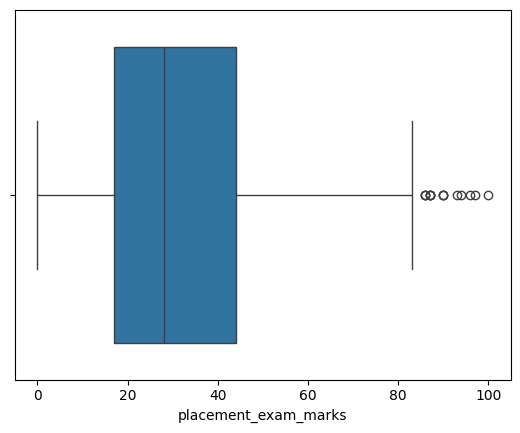

In [26]:
# Boxplot to visualise Outliers
sns.boxplot(x='placement_exam_marks', data=df)
plt.show()

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

cgpa                     0.82
placement_exam_marks    27.00
placed                   1.00
dtype: float64


In [28]:
# Find Outliers
print(df<(Q1-1.5*IQR)) or (df>(Q3+1.5*IQR))

      cgpa  placement_exam_marks  placed
0    False                 False   False
1    False                 False   False
2    False                 False   False
3    False                 False   False
4    False                 False   False
..     ...                   ...     ...
995  False                 False   False
996  False                 False   False
997   True                 False   False
998  False                 False   False
999   True                 False   False

[998 rows x 3 columns]


,cgpa,placement_exam_marks,placed
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,True,False,False
996,True,False,False
997,False,False,False
998,True,False,False


In [29]:
# Find Median
print(df['placement_exam_marks'].quantile(0.5))
print(df['placement_exam_marks'].quantile(0.95))
print(df['placement_exam_marks'].quantile(0.75))

28.0
68.0
44.0


In [30]:
# Replace Outliers with Median value
df['placement_exam_marks']  = np.where(df['placement_exam_marks']>68.0, 44.0, df['placement_exam_marks'])

In [31]:
df.describe()

,cgpa,placement_exam_marks,placed
count,998.000000,998.000000,998.000000
mean,6.961333,30.486974,0.488978
std,0.616271,15.984362,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,68.000000,1.000000


/Users/arshraina/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


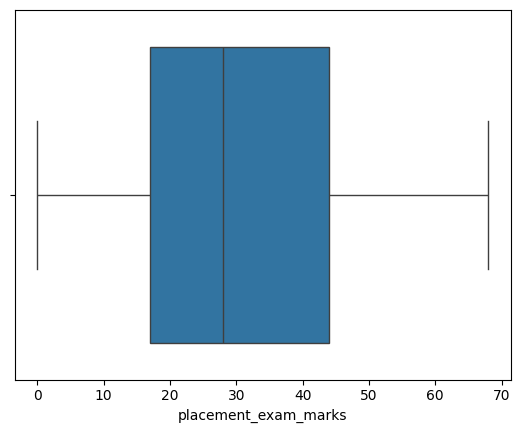

In [32]:
# Visualising the removal of Outliers
sns.boxplot(x='placement_exam_marks', data=df)
plt.show()

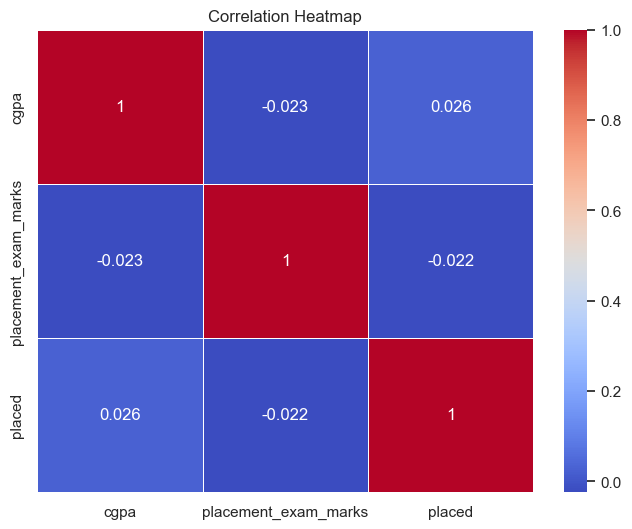

In [33]:
# Correlation Heatmap
correlation_matrix = df.corr()
sns.set(style="white")  
plt.figure(figsize=(8, 6))  
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,  
    cmap="coolwarm",  
    linewidths=.5,
)
plt.title('Correlation Heatmap')
plt.show()

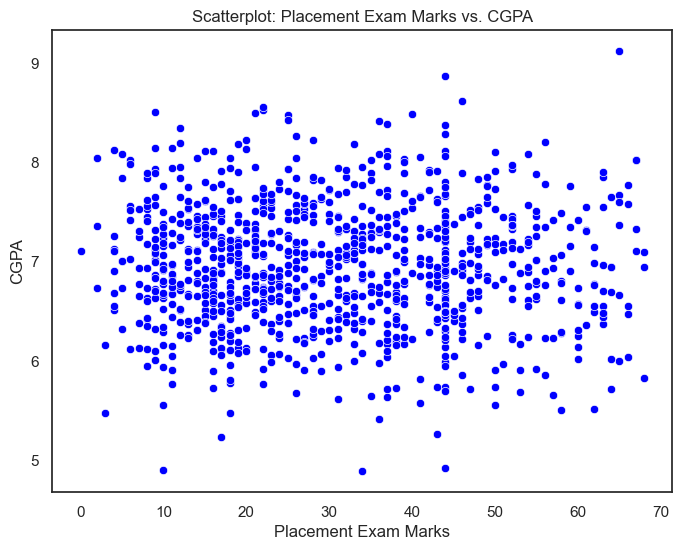

In [34]:
# Scatterplot
plt.figure(figsize=(8, 6))  
scatterplot = sns.scatterplot(
    x='placement_exam_marks',
    y='cgpa',
    data=df,
    marker='o', 
    color='blue',  
)
plt.title('Scatterplot: Placement Exam Marks vs. CGPA')
plt.xlabel('Placement Exam Marks')
plt.ylabel('CGPA')
plt.show()

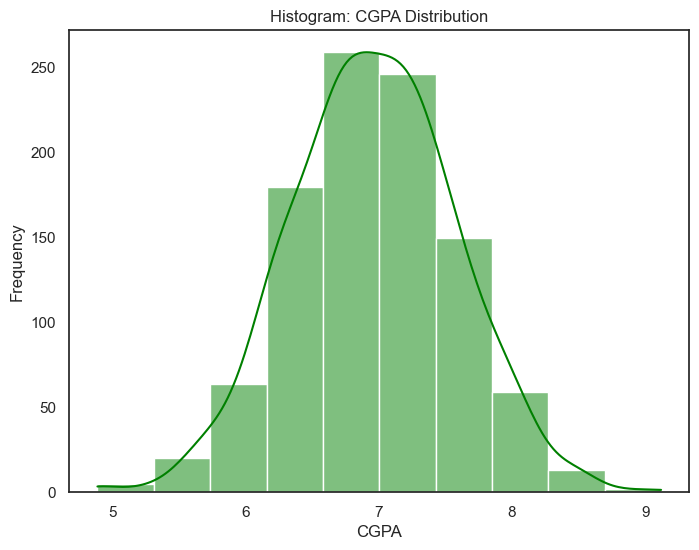

In [35]:
# Histogram
plt.figure(figsize=(8, 6))  
histogram = sns.histplot(
    df['cgpa'],
    bins=10,  
    kde=True,  
    color='green',  
)
plt.title('Histogram: CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

/Users/arshraina/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/arshraina/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/arshraina/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

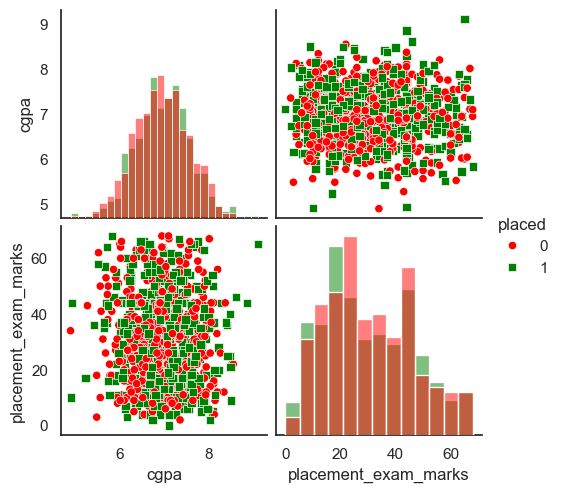

In [47]:
sns.pairplot(df, hue='placed', markers=["o", "s"], palette={0: 'red', 1: 'green'}, diag_kind='hist')
plt.show()

In [37]:
print("\nCleaned Dataset")
print(df.head(50))


Cleaned Dataset
    cgpa  placement_exam_marks  placed
0   7.19                  26.0       1
1   7.46                  38.0       1
2   7.54                  40.0       1
3   6.42                   8.0       1
4   7.23                  17.0       0
6   6.69                  11.0       0
7   7.12                  39.0       1
8   6.45                  38.0       0
9   7.75                  44.0       1
10  6.82                  16.0       1
11  6.38                   7.0       1
12  6.58                  16.0       1
13  5.68                  26.0       0
14  7.91                  43.0       0
15  7.10                  21.0       0
17  7.56                  22.0       1
18  6.93                  27.0       0
19  7.63                  29.0       0
20  6.69                  47.0       0
21  7.43                  33.0       1
22  6.76                  54.0       1
23  6.05                  11.0       0
24  6.44                  11.0       0
25  6.28                  58.0       1
26  7.45